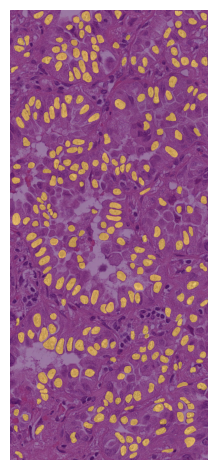

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/home/mukesh/dev/MoNuSAC/data/test/masks/TCGA-55-7573-01Z-00-DX1/3/in.png")
mask = Image.open("/home/mukesh/dev/MoNuSAC/data/test/masks/TCGA-55-7573-01Z-00-DX1/3/0.png")

plt.imshow(img)
plt.imshow(mask, alpha=0.5)
plt.axis("off")
plt.tight_layout()
plt.show()
